# OPENCV

In [8]:
import numpy as np
from skimage.morphology import watershed
from skimage.feature import peak_local_max
import matplotlib.pyplot as plt
from scipy import ndimage
%matplotlib inline 

In [84]:
import cv2
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('/Users/KamilBelkhayat/Desktop/thesis/very_zoom.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

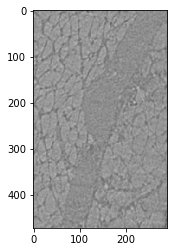

In [85]:
plt.imshow(img)

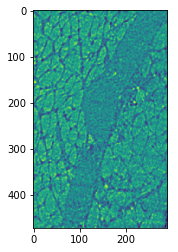

In [86]:
plt.imshow(gray)

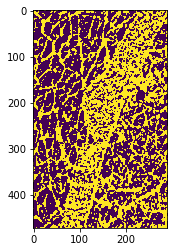

In [87]:
plt.imshow(thresh)

In [88]:
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

In [63]:
scipy.misc.imsave('outfile2.jpg', markers)

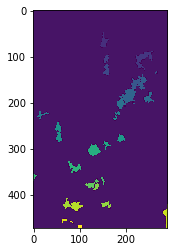

In [89]:
plt.imshow(markers)

In [90]:
# import the necessary packages
from skimage.feature import peak_local_max
from skimage.morphology import watershed
from scipy import ndimage
import numpy as np
import argparse
import cv2
 
# construct the argument parse and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-i", "--image", required=True,
	help="path to input image")
args = vars(ap.parse_args())
 
# load the image and perform pyramid mean shift filtering
# to aid the thresholding step
image = cv2.imread(args["image"])
shifted = cv2.pyrMeanShiftFiltering(image, 21, 51)
cv2.imshow("Input", image)
 
# convert the mean shift image to grayscale, then apply
# Otsu's thresholding
gray = cv2.cvtColor(shifted, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255,
	cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
cv2.imshow("Thresh", thresh)

usage: __main__.py [-h] -i IMAGE
__main__.py: error: the following arguments are required: -i/--image


SystemExit: 2

/Users/KamilBelkhayat/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2889: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
